# Assignment - Linear Regression

## Step 1: Read and understand the data

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import relevant packages for reading and understanding the data
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)

In [3]:
# load the data 
car_price = pd.read_csv('CarPrice_Assignment.csv')

# check the head
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# check shape
print(car_price.shape)

(205, 26)


### There are 205 records across 26 columns

In [5]:
# check info
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### There are 16 numeric variables and 10 categorical variables. All the columns have 205 records. 
Let's still check for the missing values across columns.

In [6]:
# check for missing values
print(round(100*(car_price.isnull().sum(axis=0) / car_price.shape[0]),2))

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64


### There are indeed no missing values in the data set.

In [7]:
# Describe the dataframe
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### There is a huge variation in the minimum and the maximum values of the prices of the cars in the American market. 

## Step 2: Clean the data

### There is no need for the variable 'car_ID', since it represents the unique id of each observation. let's drop it.

In [8]:
# drop varibale 'car_ID'
car_price.drop('car_ID', axis=1, inplace=True)

# check shape
print(car_price.shape)

(205, 25)


### Extract the car company from the variable 'CarName' as CarCompany, since 'CarName' is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model' and only car company is to be considered as the independant variable for model building

In [9]:
# create new varibale named 'CarCompany' from variable 'CarName'
car_price['CarCompany'] = car_price['CarName'].apply(lambda x: x.split()[0])

In [10]:
# check head
car_price.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [11]:
# drop the variable 'CarName' as it's not relevant for model building
car_price.drop('CarName', axis=1, inplace=True)

In [12]:
# check head again
car_price.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [13]:
# check shape
print(car_price.shape)

(205, 25)


### Fix values which are invalid or have spelling mistakes in categorical columns.

There were 10 categorical columns. Let's check for any data issues for these columns.

In [14]:
# check the categorical columns.
cat_cols = list(car_price.select_dtypes('object').columns)

print(cat_cols)

print(len(car_price.select_dtypes('object').columns))

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarCompany']
10


### As mentioned, there are 10 categorical columns. Let's check for data validations in them.  

In [15]:
# create temp data frame for 10 categories
car_price_cat  = car_price[cat_cols]

#check head
car_price_cat.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarCompany
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [16]:
# print unique values of categorical columns
for col in cat_cols:
    print('--------------',col,'-------------------------')
    print(car_price_cat[col].value_counts())

-------------- fueltype -------------------------
gas       185
diesel     20
Name: fueltype, dtype: int64
-------------- aspiration -------------------------
std      168
turbo     37
Name: aspiration, dtype: int64
-------------- doornumber -------------------------
four    115
two      90
Name: doornumber, dtype: int64
-------------- carbody -------------------------
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
-------------- drivewheel -------------------------
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
-------------- enginelocation -------------------------
front    202
rear       3
Name: enginelocation, dtype: int64
-------------- enginetype -------------------------
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
-------------- cylindernumber -------------------------
four      159
six        24
five       11
eight

### The variable 'CarCompany' has some values which have spelling mistakes, due to which there are duplicate values. There are total of 28 different unique values for 'CarCompany'. The repeated ones are:
1. **maxda** and **mazda** are the same. It should be **'mazda'**


2. **Nissan** and **nissan** are the same. It should be **'nissan'**


3. **porsche** and **porcshce** are the same. It should be **'porsche'**


4. **toyota** and **toyouta** are the same. It should be **'toyota'**


5. **vokswagen**, **volkswagen**, and **vw** are the same. It should be **'volkswagen'**


In [17]:
# Fix the values of 'CarCompany'
car_price.replace(to_replace='maxda', value='mazda', inplace=True)
car_price.replace(to_replace='Nissan', value='nissan', inplace=True)
car_price.replace(to_replace='porcshce', value='porsche', inplace=True)
car_price.replace(to_replace='toyouta', value='toyota', inplace=True)
car_price.replace(to_replace='vokswagen', value='volkswagen', inplace=True)
car_price.replace(to_replace='vw', value='volkswagen', inplace=True)

In [18]:
# check the values
car_price.CarCompany.value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: CarCompany, dtype: int64

In [19]:
# check the length
len(car_price.CarCompany.value_counts())

22

### The values of variable 'CarCompany' have been fixed. Now, there are 22 unique values in it.

In [20]:
# drop duplicate values, if any
car_price.drop_duplicates(keep='first', inplace=True)

# check shape
print(car_price.shape)

(205, 25)


### There are no duplicate values. There are still 205 records in total

## Step 2: Visualize the data

In [21]:
# import relevant packages for visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

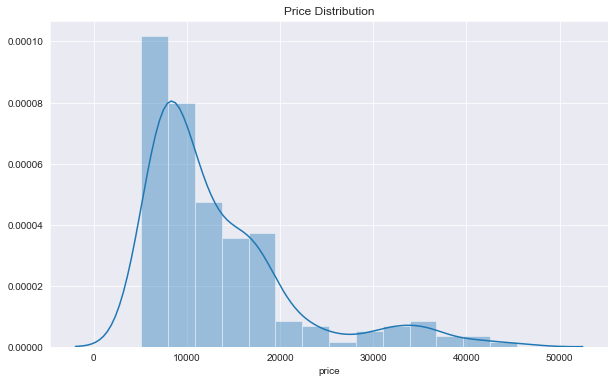

In [22]:
# plot the distribution of the target variable 'price'
plt.figure(figsize=(10,6))
plt.title('Price Distribution')
sns.distplot(car_price.price)
plt.show()

### The distribution of price seems to be heavily skewed at the higher range, which indicates that there are some outliers. 
Let's check if this is really true.

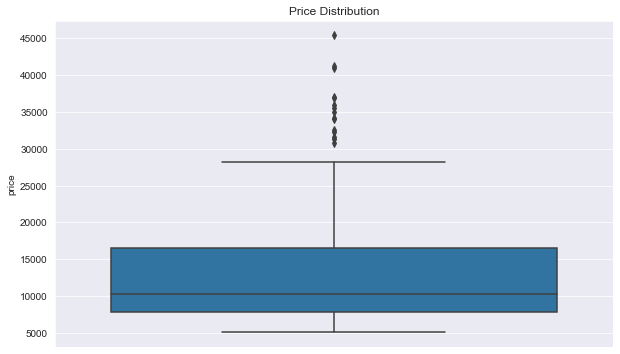

In [23]:
# plot to check the outliers
plt.figure(figsize=(10,6))
sns.boxplot(y=car_price.price)
plt.title('Price Distribution')
plt.show()

### There are indeed some outliers in the higher range for the target variable 'price'

### Step 2.1: Numerical data analysis

In [24]:
# check correlation amongst numerical data
car_price.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


### Correlation of Target variable 'price' with independant variables
- **Price** and **enginesize** have the highest correration of **0.8741**.

### Correlation of independant variables amongst themselves
- **citympg** and **highwaympg** have the highest correlation of **0.9713**
Let's visualize the correlations with a heatmap

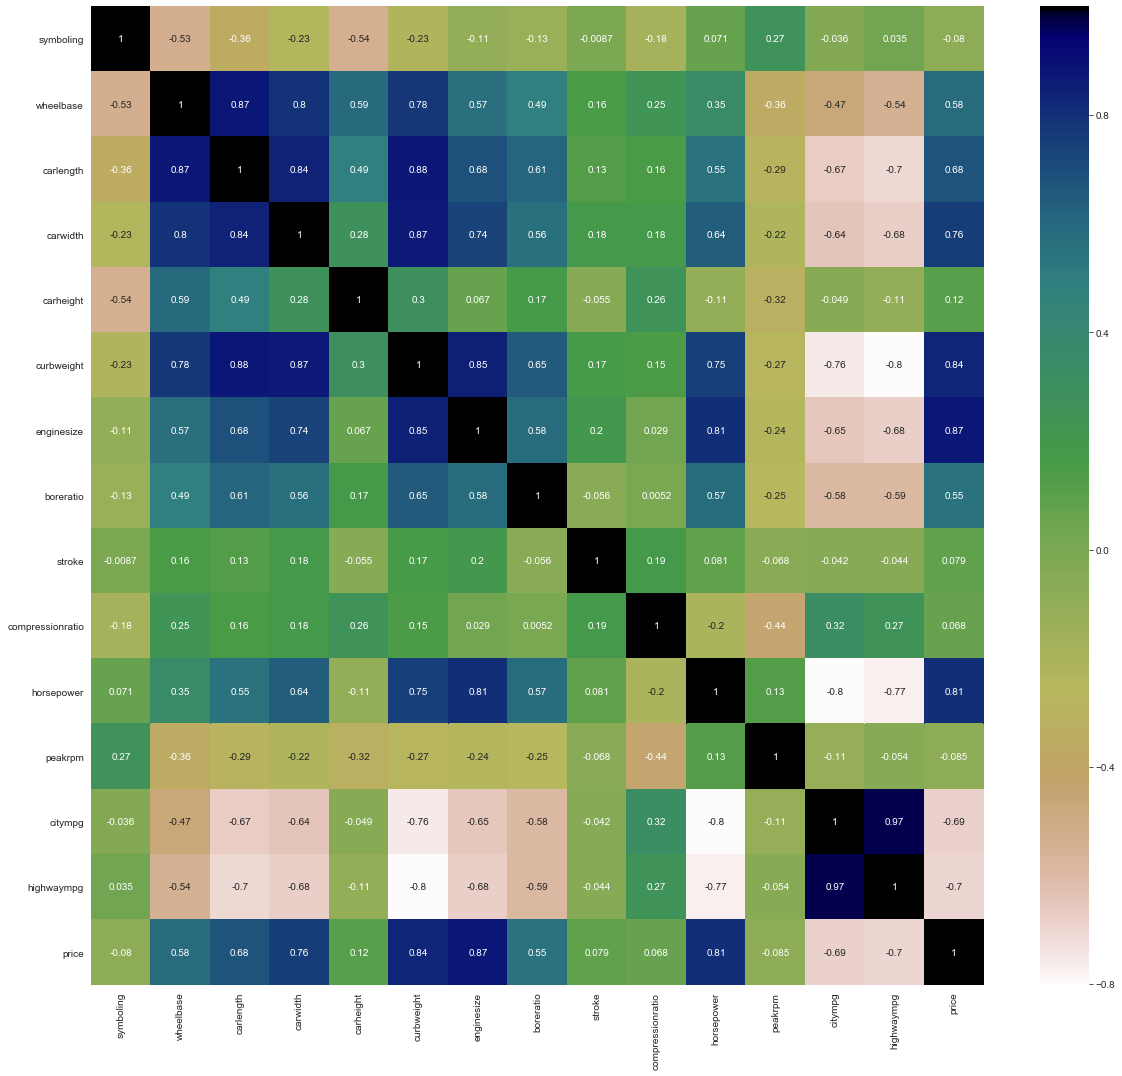

In [25]:
# Visualize numerical data
plt.figure(figsize=(20,18))
sns.heatmap(car_price.corr(),annot=True,cmap='gist_earth_r')
plt.show()

### There seems to be a strong linear relationship between:
- price-enginesize


- price-curbweight


- price-horsepower 

They all have a relationship above 80%.

Let's plot all the numerical variables and see the correlation.

#### As the enginesize increases the price also increases. Same trend is seen for curbweight and horsepower. These 3 variables seem to  be the most important ones, although there are other variables which have linear relationship with 'price', but not this strong.

In [26]:
# create pairplot of the numerical variables with the target variable 'price'
def create_pairplot(cols):
    sns.pairplot(x_vars=cols, y_vars='price',data=car_price, size=5)
    plt.show()

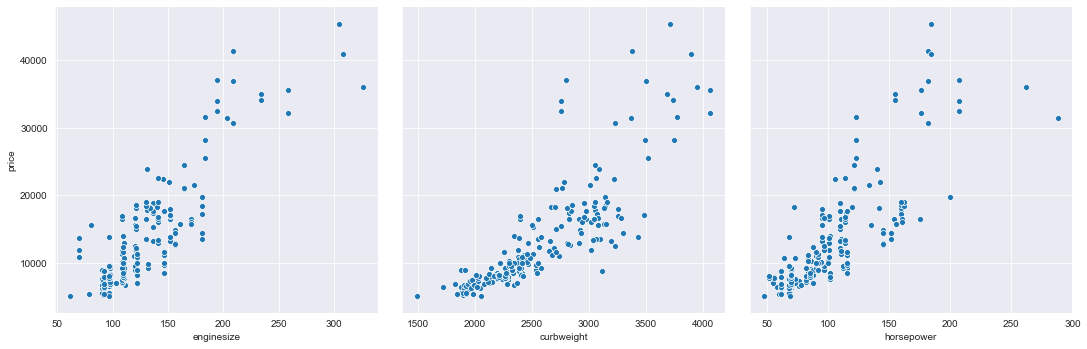

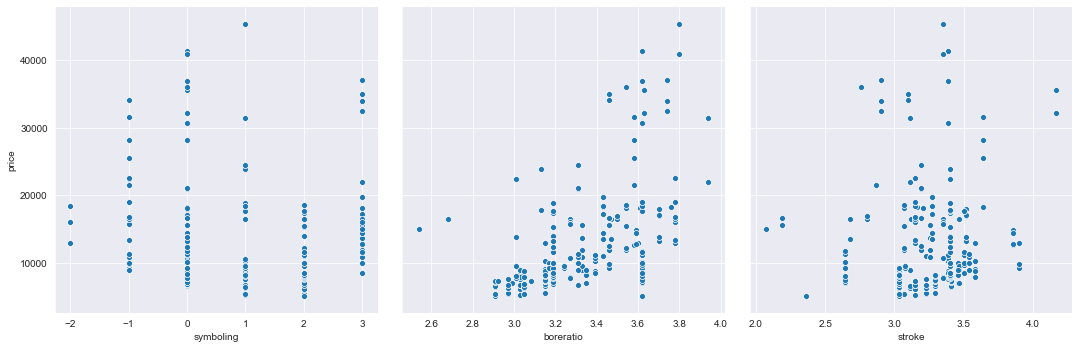

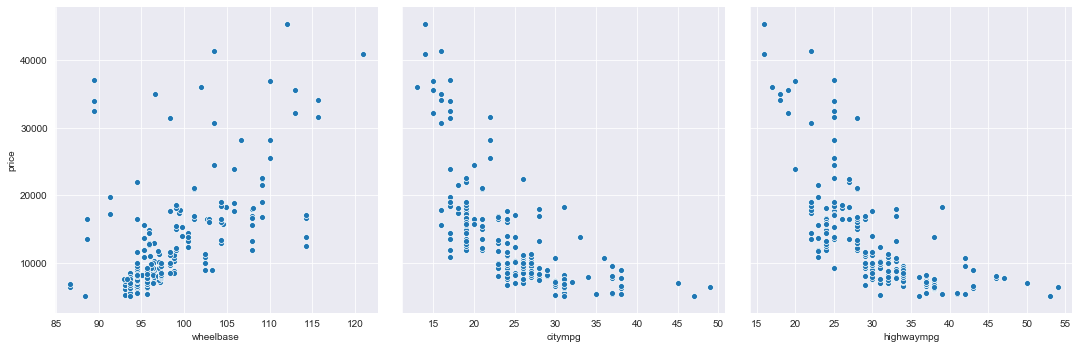

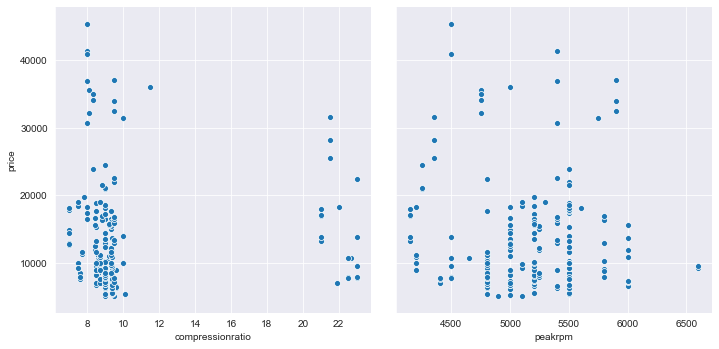

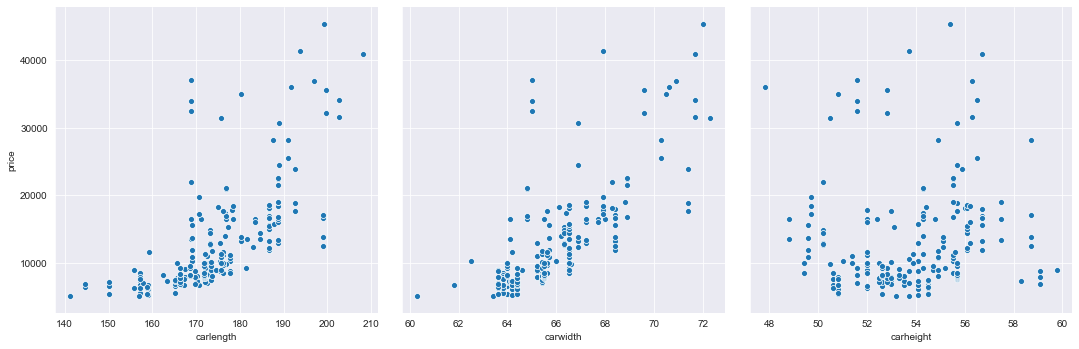

In [27]:
create_pairplot(['enginesize','curbweight','horsepower'])
create_pairplot(['symboling','boreratio', 'stroke'])
create_pairplot(['wheelbase', 'citympg', 'highwaympg'])
create_pairplot(['compressionratio', 'peakrpm'])
create_pairplot(['carlength', 'carwidth','carheight'])

### Observations: (for 14 numerical variables except price)
Variables showing linear relationship with the target variable 'price'
1. **enginesize** - positive correlation
2. **curbweight** - positive correlation
3. **horsepower** - positive correlation
4. **boreratio** - positive correlation
5. **wheelbase** - positive correlation
6. **citympg** - negative correlation
7. **highwaympg** - negative correlation
8. **carlength** - positive correlation
9. **carwidth** - positive correlation


Variables that show no significant linear relationship with the target variable 'price'
1. **symboling**
2. **stroke**
3. **compressionratio**
4. **peakrpm**
5. **carheight**

In [28]:
# Drop the variables that don't have any significant relationship with the target variable
cols_to_drop = ['symboling','stroke','compressionratio','peakrpm','carheight']
car_price.drop(columns=cols_to_drop, axis=1, inplace=True)

# check shape
print(car_price.shape)

(205, 20)


### Step 2.2: Categorical data analysis

In [29]:
# visualize categorical attributes
cat_cols = list(car_price.select_dtypes('object').columns)
print(cat_cols)
print(len(cat_cols))

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarCompany']
10


There are 10 columns

In [30]:
def create_boxplot(cols):
    plt.figure(figsize=(15,7))
    plt.subplot(121)
    sns.boxplot(x=cols[0],y='price',data=car_price)
    plt.subplot(122)
    sns.boxplot(x=cols[1],y='price',data=car_price)
    plt.xticks(rotation=90)
    plt.show()   

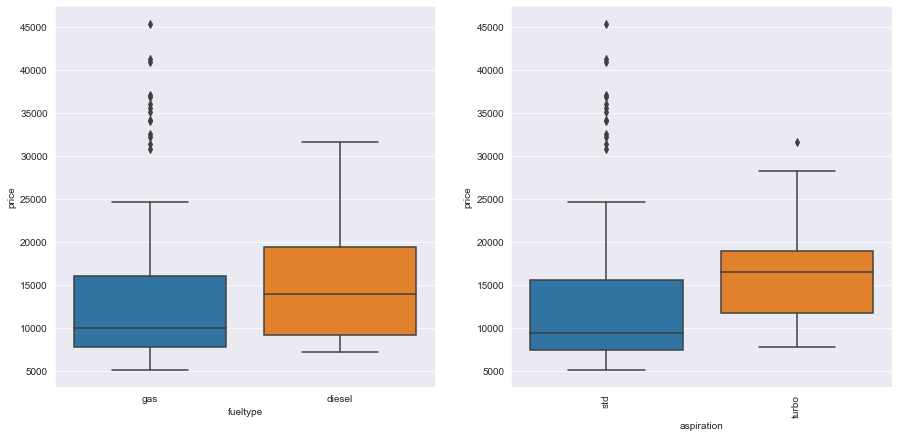

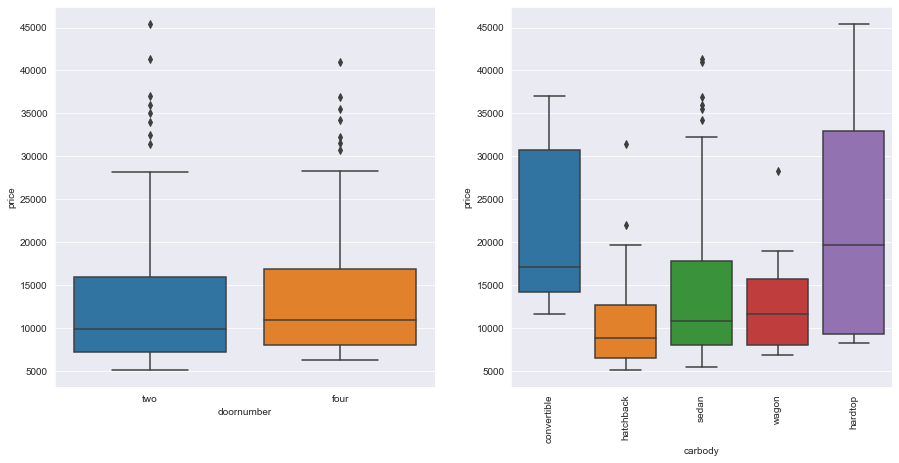

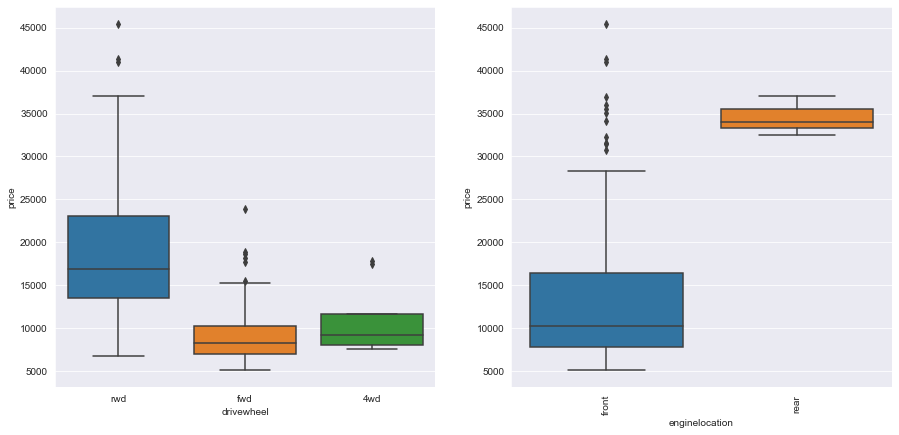

In [31]:
create_boxplot(['fueltype','aspiration'])
create_boxplot(['doornumber','carbody'])
create_boxplot(['drivewheel','enginelocation'])

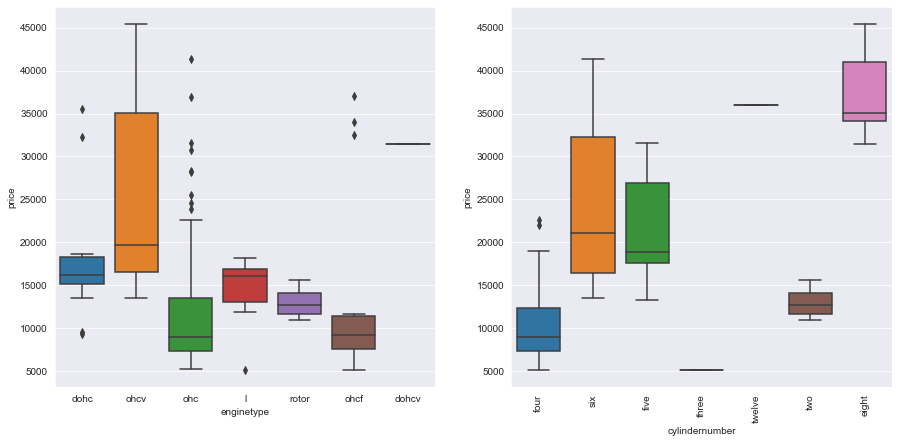

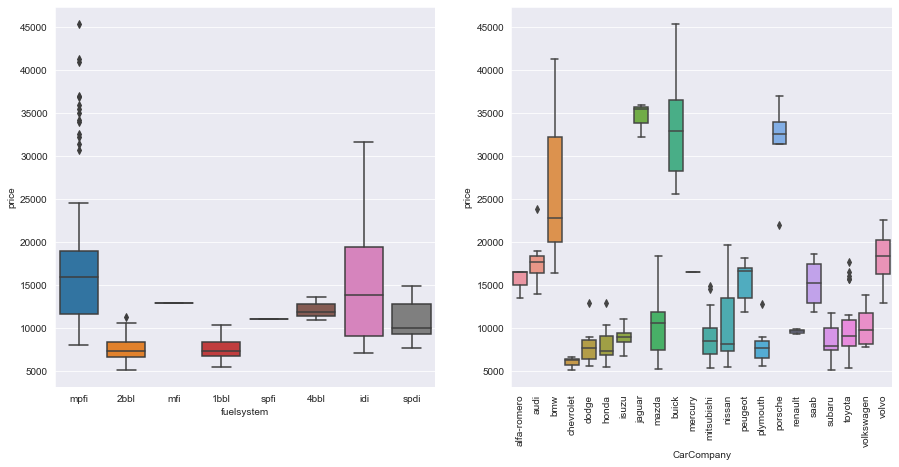

In [32]:
create_boxplot(['enginetype','cylindernumber'])
create_boxplot(['fuelsystem','CarCompany'])

### Observations:
1. Cars with **fueltype** as 'Diesel' have higher price on an average when compare to the ones with 'Petrol' engines.



2. Cars with **aspiration** as turbo has higher price range. 



3. Cars with **doornumber** as 'two' and 'four' show similar price brackets. - **Not significant for modelling.**


4. Cars with **carbody** as hardtop and convertible have higher price ranges.


5. Cars with **drivewheel** as rwd have major effect on the price.


6. Cars with **enginelocation** at 'rear' have high prices than the ones that are located at the 'front', but the data seems very less for rear location as compared to front location. **This variable can't be considered significant enough for the model.**


7. Cars with **enginetype** as ohcv has higher price range.


8. Cars with **cylindernumber** has variations across all the categories. cars with 8 cylinders have the highest price range.


9. Cars with **fuelsystem** don't have enough data for all the categories to be used for the model. **Not significant**


10. Cars with **CarCompany** as Jaguar and Buick have higher price range.

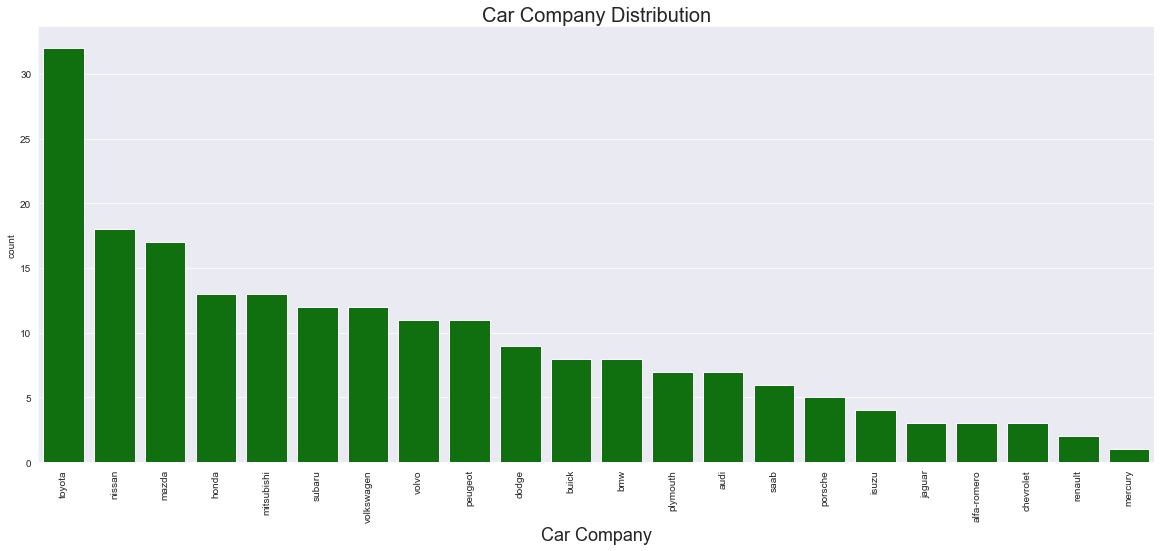

In [33]:
### Analyse the categorical variable 'CarCompany'
plt.figure(figsize=(20,8))
sns.countplot(car_price['CarCompany'], order=car_price['CarCompany'].value_counts().index,color='green')
plt.xlabel('Car Company', fontsize=18)
plt.title('Car Company Distribution',fontsize=20)
plt.xticks(rotation=90)
sns.despine(top=True)
plt.show()

#### Car Company-Toyota has the highest frequency, which means the people prefer Toyota the most

### Create derived variables
1. **CatCompany** from **CarCompany** and **price**


2. **Mileage** from **citympg** and **highwaympg**

In [34]:
# create new data frame to store average prices of distinct car companies
car_avg_price = car_price[['price','CarCompany']].groupby('CarCompany', as_index=False).mean().rename(columns={'price': 'avg_price'})
car_avg_price.head()

,CarCompany,avg_price
0,alfa-romero,15498.333333
1,audi,17859.166714
2,bmw,26118.750000
3,buick,33647.000000
4,chevrolet,6007.000000


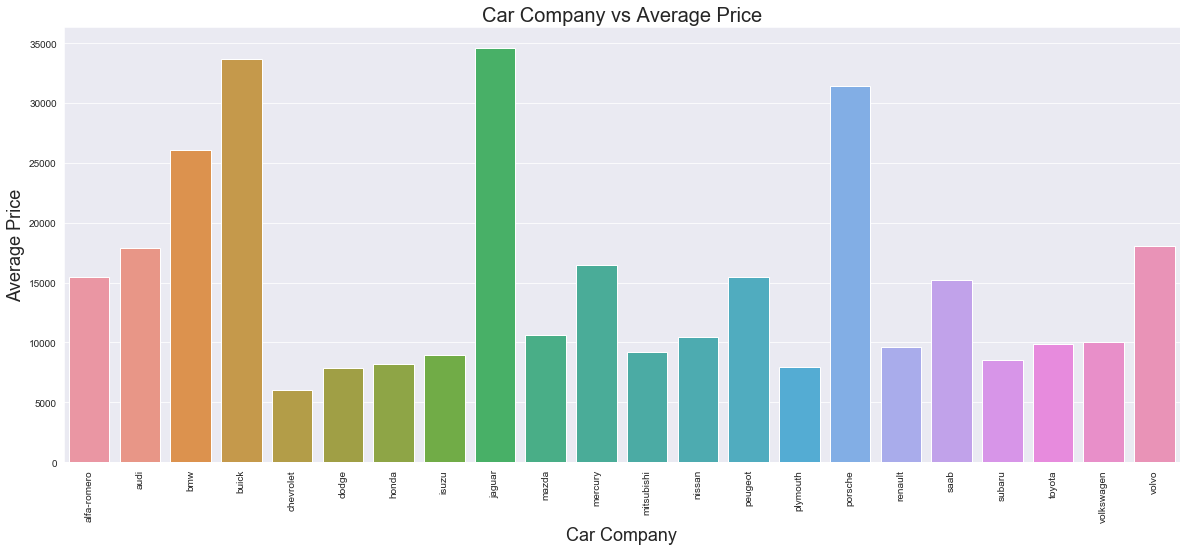

In [35]:
# plot the bar graph to visualize average price with car company
plt.figure(figsize=(20,8))
sns.barplot(x='CarCompany',y='avg_price',data=car_avg_price)
plt.xlabel('Car Company', fontsize=18)
plt.ylabel('Average Price', fontsize=18)
plt.title('Car Company vs Average Price',fontsize=20)
plt.xticks(rotation=90)
plt.show()

### Create new variable 'CatCompany' in car_price data frame 

In [36]:
# mearge the original data frame with the one having average price according to CarCompany
car_price = car_price.merge(car_avg_price, on='CarCompany')

#check head
car_price.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,CarCompany,avg_price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0,alfa-romero,15498.333333
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0,alfa-romero,15498.333333
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,alfa-romero,15498.333333
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0,audi,17859.166714
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0,audi,17859.166714


In [37]:
# create CatCompany variable describing the Category of the company
car_price['CatCompany'] = car_price['avg_price'].apply(lambda x: 'LowRange' if x < 10000
                                                                  else ('MidRange' if 10000 <= x < 20000 else 'HighRange'))

# drop avg_price column
car_price.drop('avg_price',axis=1,inplace=True)

# check head
car_price.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,CarCompany,CatCompany
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0,alfa-romero,MidRange
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0,alfa-romero,MidRange
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,alfa-romero,MidRange
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0,audi,MidRange
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0,audi,MidRange


### Mileage can be calculated based on weighted average of 55% city mileage and 45% highway mileage

In [38]:
# create a new variable named 'mileage' using citympg and highwaympg
car_price['mileage'] = car_price['citympg']*0.55 + car_price['highwaympg']*0.45

#check head
car_price.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,CarCompany,CatCompany,mileage
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0,alfa-romero,MidRange,23.70
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0,alfa-romero,MidRange,23.70
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,alfa-romero,MidRange,22.15
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0,audi,MidRange,26.70
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0,audi,MidRange,19.80


#### Columns to drop

1. **citympg** and **highwaympg** - Since a new variable named **mileage** has been derived from these 2 columns. Plus, there is a high correlation between both of them.


2. **CarCompany** - A new derived variable named **CatCompany** has been derived, which makes more sense w.r.t. the price prediction. Although, people generally prefer one company over other, but when it comes to purchasing a car, people tend to select multiple car companies based on their budget, such as Luxury cars, low end cars, etc. This categorization is depicted by the feature **CatCompany**. Hence, **CarCompany** can be dropped

In [39]:
# Drop the variables that are not significant enough for model building
cols_to_drop = ['doornumber','enginelocation','fuelsystem','CarCompany','citympg','highwaympg']
car_price.drop(columns=cols_to_drop, axis=1, inplace=True)

# check shape
car_price.shape

(205, 16)

## Step 3: Data Preparation

In [40]:
# import relevant packages related to data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#### Deal with Categorical variables

1. Encoding
    - change binary cat vars to 1/0
    - change other cat vars to dummies
    
    
2. Splitting into train and test


3. Rescaling of variables

### 1. Encoding

### 1.1 Change Binary to 0 / 1

In [41]:
# extract categorical varibales from car_price data frame
cat_cols = list(car_price.select_dtypes('object').columns)

# create temp data frame with categorical columns
car_price_cat = car_price[cat_cols]

# check head
car_price_cat.head()

,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,CatCompany
0,gas,std,convertible,rwd,dohc,four,MidRange
1,gas,std,convertible,rwd,dohc,four,MidRange
2,gas,std,hatchback,rwd,ohcv,six,MidRange
3,gas,std,sedan,fwd,ohc,four,MidRange
4,gas,std,sedan,4wd,ohc,five,MidRange


In [42]:
# describe the categorical data frame
car_price_cat.describe()

,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,CatCompany
count,205,205,205,205,205,205,205
unique,2,2,5,3,7,7,3
top,gas,std,sedan,fwd,ohc,four,LowRange
freq,185,168,96,120,148,159,95


### It can be seen that there are 2 variables with binary values, i.e. 2 values. These are:
1. fueltype


2. aspiration

In [43]:
# extract those variable names from the dataframe
binary_cols = list(car_price_cat.loc[:,car_price_cat.nunique() == 2].columns)

print(binary_cols)

['fueltype', 'aspiration']


In [44]:
# encode the binary variables
for col in binary_cols:
    car_price[[col]] = car_price[[col]].apply(lambda x: x.map({car_price[col].unique()[0] : 0,
                                                               car_price[col].unique()[1] : 1}))

In [45]:
# check head
car_price.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,CatCompany,mileage
0,0,0,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,MidRange,23.70
1,0,0,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,MidRange,23.70
2,0,0,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,MidRange,22.15
3,0,0,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,MidRange,26.70
4,0,0,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,MidRange,19.80


### 1.2 Change other Categorical vars to dummies

In [46]:
# extract categorical varibales from car_price data frame
cat_cols = list(car_price.select_dtypes('object').columns)

print(cat_cols)

['carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'CatCompany']


In [47]:
# create dummies for all the remaining 6 columns
# car_price = pd.get_dummies(data=car_price, columns = cat_cols)
for col in cat_cols:
    dummies = pd.get_dummies(car_price[col], drop_first=True)
    car_price = pd.concat([car_price,dummies], axis=1)
    car_price.drop(columns=col, axis=1, inplace=True)

In [48]:
# check head
car_price.head()

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,LowRange,MidRange
0,0,0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,23.70,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,88.6,168.8,64.1,2548,130,3.47,111,16500.0,23.70,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,94.5,171.2,65.5,2823,152,2.68,154,16500.0,22.15,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,0,0,99.8,176.6,66.2,2337,109,3.19,102,13950.0,26.70,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,0,0,99.4,176.6,66.4,2824,136,3.19,115,17450.0,19.80,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [49]:
# check shape of the data frame
car_price.shape

(205, 31)

### There are now 31 columns in the data frame.

### 2. Split into train and test set

In [50]:
# create train and test data sets
car_price_train , car_price_test = train_test_split(car_price, train_size=0.7, test_size=0.3,random_state=100)

In [51]:
# check shape of train and test data sets
print(car_price_train.shape)
print(car_price_test.shape)

(143, 31)
(62, 31)


### Train set has 70% of the total data. The remaining 30% data is with test set.

### 3. Rescale the variables

#### MinMax Scaling would be used because it will scale all the values between 0 and 1. It also takes care of the outliers.

In [52]:
# Instantiate the MinMaxScaler object
scaler_obj = MinMaxScaler()

# fit the data-----
# create list of numeric variables.
num_vars = list(car_price_train.select_dtypes(['int64','float64']).columns)   

# display the list of numerical variables
print(num_vars)

# check length
print(len(num_vars))

['fueltype', 'aspiration', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'price', 'mileage']
11


#### There are 11 numerical variables, but all of them need not be rescaled. The binary variables need not  be scaled, since the interpretability of them will be lost. The binary variables are:
1. fueltype


2. aspiration


#### Let's take out these variables from the num_vars list. There will be 9 variables left.

In [53]:
# binary cols earlier created
print(binary_cols)

# pop the binary variables from the num_vars list
for col in binary_cols:
    num_vars.pop(num_vars.index(col))

['fueltype', 'aspiration']


In [54]:
# check the numerical variables again
# display the list of numerical variables
print(num_vars)

# check length
print(len(num_vars))

['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'price', 'mileage']
9


In [55]:
# rescale the variables
car_price_train[num_vars] = scaler_obj.fit_transform(car_price_train[num_vars])

# check head
car_price_train.head()

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,LowRange,MidRange
122,0,0,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.068818,0.530864,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
125,0,0,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.466890,0.213992,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
166,0,0,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.122110,0.344307,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.314446,0.244170,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
199,0,1,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.382131,0.122085,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [56]:
# describe the data frame
car_price_train.describe()

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,LowRange,MidRange
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.090909,0.181818,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.219310,0.358265,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.468531,0.412587
std,0.288490,0.387050,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.215682,0.185980,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.500763,0.494030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.067298,0.198903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.140343,0.344307,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.313479,0.512346,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### All the variables have min as 0 and max as 1. Variables are now scaled.

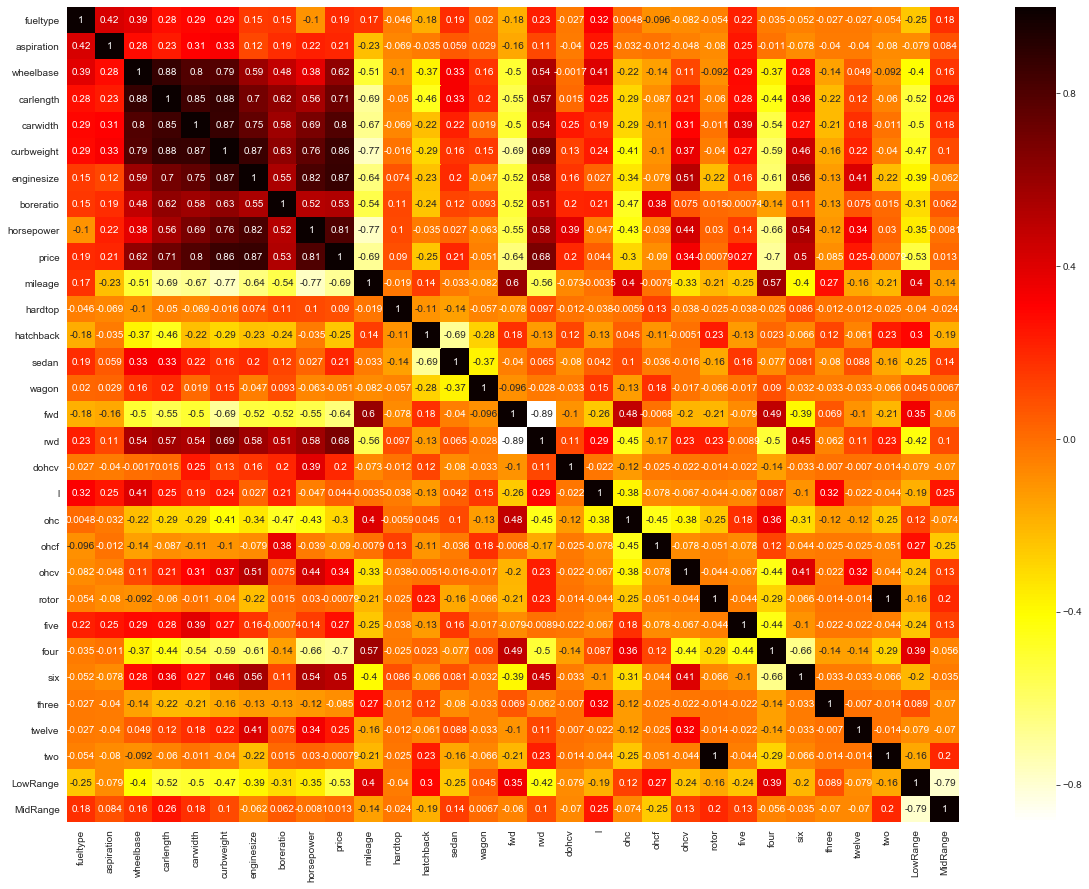

In [57]:
# plot correlation of price with all the predictors
plt.figure(figsize=(20,15))
sns.heatmap(car_price_train.corr(),annot=True,cmap='hot_r')
plt.show()

### The following have high correlation with price:

1. enginesize
2. curbweight
3. carwidth
4. carlength
5. horsepower

#### Dividing the train set into X_train and y_train sets for model building
1. **Training data** is the one wherein we train and fit the data to the algorithm.


2. **Testing data** is the one wherein we test that data based on the trained data and check the performance of the model

In [58]:
# y_train --> dependant / target variable
# X_train --> independant / predictor variables
y_train = car_price_train.pop('price')
X_train = car_price_train

# check shapes of X_train and y_train
print(y_train.shape)
print(X_train.shape)

(143,)
(143, 30)


### There are 30 predictors and 1 target. Data is now prepared for modelling.

## Step 4: Build the model

In [59]:
# import relevant packages
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# create function to select features based on RFE
def select_features_rfe(X,y):
    # create Linear Regression Object
    lr = LinearRegression()
    
    # fit the model
    lr.fit(X,y)
    
    # Run RFE with the output number of the variable equal to 10
    rfe = RFE(lr,10)
    
    # fit the model
    rfe=rfe.fit(X,y)
    
    return rfe

In [61]:
# create function to build model
def build_model(y,X):
    # add constant to X_train
    X_sm = sm.add_constant(X)
    
    # create OLS object
    lr_obj = sm.OLS(y,X_sm)
    
    # fit the model
    lr_model = lr_obj.fit()
    
    # check summary
    print(lr_model.summary())
    
    return X_sm
    

In [62]:
# create function to check VIF
def check_vif(X):
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [63]:
# select features using RFE
rfe = select_features_rfe(X_train,y_train)

In [64]:
# check the list of features with their rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 17),
 ('aspiration', False, 18),
 ('wheelbase', False, 3),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('mileage', True, 1),
 ('hardtop', False, 4),
 ('hatchback', True, 1),
 ('sedan', False, 2),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 9),
 ('ohcf', False, 8),
 ('ohcv', False, 12),
 ('rotor', False, 20),
 ('five', False, 7),
 ('four', False, 5),
 ('six', False, 6),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 21),
 ('LowRange', True, 1),
 ('MidRange', True, 1)]

In [65]:
# check the selected columns
col = X_train.columns[rfe.support_]
print(col)

Index(['carwidth', 'curbweight', 'horsepower', 'mileage', 'hatchback', 'wagon',
       'dohcv', 'twelve', 'LowRange', 'MidRange'],
      dtype='object')


In [66]:
# remove the columns which are not selected
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'wheelbase', 'carlength', 'enginesize',
       'boreratio', 'hardtop', 'sedan', 'fwd', 'rwd', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'two'],
      dtype='object')

In [67]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

# check head
X_train_rfe.head()

,carwidth,curbweight,horsepower,mileage,hatchback,wagon,dohcv,twelve,LowRange,MidRange
122,0.291667,0.272692,0.083333,0.530864,0,0,0,0,1,0
125,0.666667,0.500388,0.395833,0.213992,1,0,0,0,0,0
166,0.308333,0.314973,0.266667,0.344307,1,0,0,0,1,0
1,0.316667,0.411171,0.262500,0.244170,0,0,0,0,0,1
199,0.575000,0.647401,0.475000,0.122085,0,1,0,0,0,1


#### Create model based on the selected features

## Model 1

In [68]:
X_train_rfe = build_model(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     175.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.67e-71
Time:                        13:20:08   Log-Likelihood:                 207.21
No. Observations:                 143   AIC:                            -392.4
Df Residuals:                     132   BIC:                            -359.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1326      0.046      2.869      0.0

#### p-value of 'wagon' is higher than the significance value of 0.05. Let's drop it

In [69]:
X_train_rfe = X_train_rfe.drop('wagon',axis=1)

## Model 2

In [70]:
X_train_rfe = build_model(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     192.0
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.13e-71
Time:                        13:20:08   Log-Likelihood:                 205.60
No. Observations:                 143   AIC:                            -391.2
Df Residuals:                     133   BIC:                            -361.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1259      0.046      2.715      0.0

#### p-value of 'hatchback' is higher than the significance value of 0.05. Let's drop it

In [71]:
X_train_rfe = X_train_rfe.drop('hatchback',axis=1)

## Model 3

In [72]:
X_train_rfe = build_model(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     214.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.01e-72
Time:                        13:20:08   Log-Likelihood:                 204.53
No. Observations:                 143   AIC:                            -391.1
Df Residuals:                     134   BIC:                            -364.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1226      0.047      2.635      0.0

#### p-value of 'twelve' is higher than the significance value of 0.05. Let's drop it

In [73]:
X_train_rfe = X_train_rfe.drop('twelve',axis=1)

## Model 4

In [74]:
X_train_rfe = build_model(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     239.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.86e-73
Time:                        13:20:08   Log-Likelihood:                 202.56
No. Observations:                 143   AIC:                            -389.1
Df Residuals:                     135   BIC:                            -365.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1377      0.046      2.973      0.0

#### p-value of 'mileage' is higher than the significance value of 0.05. Let's drop it

In [75]:
X_train_rfe = X_train_rfe.drop('mileage',axis=1)

## Model 5

In [76]:
X_train_rfe = build_model(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     274.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.26e-73
Time:                        13:20:09   Log-Likelihood:                 200.86
No. Observations:                 143   AIC:                            -387.7
Df Residuals:                     136   BIC:                            -367.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2025      0.029      6.865      0.0

#### p-values of all the features now are less than the significance values, i.e. 0.05. Let's check for VIF.

In [77]:
X_train_rfe = X_train_rfe.drop('const',axis=1)
check_vif(X_train_rfe)

,features,VIF
1,curbweight,30.99
0,carwidth,30.86
2,horsepower,8.83
5,MidRange,2.66
4,LowRange,2.07
3,dohcv,1.42


#### VIF of 'curbweight' is higher than the threshold value of 5. It shows multicollinearity. Let's drop it rebuild the model

In [78]:
X_train_rfe = X_train_rfe.drop('curbweight',axis=1)

## Model 6

In [79]:
X_train_rfe = build_model(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     296.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.31e-71
Time:                        13:20:09   Log-Likelihood:                 193.52
No. Observations:                 143   AIC:                            -375.0
Df Residuals:                     137   BIC:                            -357.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2110      0.031      6.841      0.0

#### p-values of all the features now are less than the significance values, i.e. 0.05. Let's check for VIF again.

In [80]:
X_train_rfe = X_train_rfe.drop('const',axis=1)
check_vif(X_train_rfe)

,features,VIF
0,carwidth,10.36
1,horsepower,6.48
4,MidRange,2.55
3,LowRange,1.93
2,dohcv,1.19


#### VIF of 'carwidth' is higher than the threshold value of 5. It shows multicollinearity. Let's drop it rebuild the model

In [81]:
X_train_rfe = X_train_rfe.drop('carwidth',axis=1)

## Model 7

In [82]:
X_train_rfe = build_model(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     231.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.47e-60
Time:                        13:20:09   Log-Likelihood:                 163.08
No. Observations:                 143   AIC:                            -316.2
Df Residuals:                     138   BIC:                            -301.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3696      0.030     12.184      0.0

#### p-values of all the features now are less than the significance values, i.e. 0.05. Let's check for VIF again

In [83]:
X_train_rfe = X_train_rfe.drop('const',axis=1)
check_vif(X_train_rfe)

,features,VIF
0,horsepower,2.07
3,MidRange,1.55
2,LowRange,1.34
1,dohcv,1.18


### p-values and VIF of the remaining predictors are in range, which means these predictors are significant and have no multicollinearity. 

## Step 5: Residual Analysis

Check if the error terms are normally distributed

In [84]:
# add constant to X_train_rfe
X_train_sm = sm.add_constant(X_train_rfe)

# fit the model
lm = sm.OLS(y_train,X_train_sm).fit()

# predict the y values of train set 
y_train_price = lm.predict(X_train_sm)

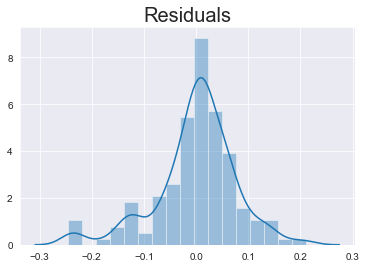

In [85]:
# plot histogram to check the distribution of residuals
res = y_train_price - y_train

sns.distplot(res)
plt.title('Residuals',fontsize=20)
plt.show()

### Residuals seem to be normally distributed and the mean is centered around 0. The assumption on the linear model is satisfied.

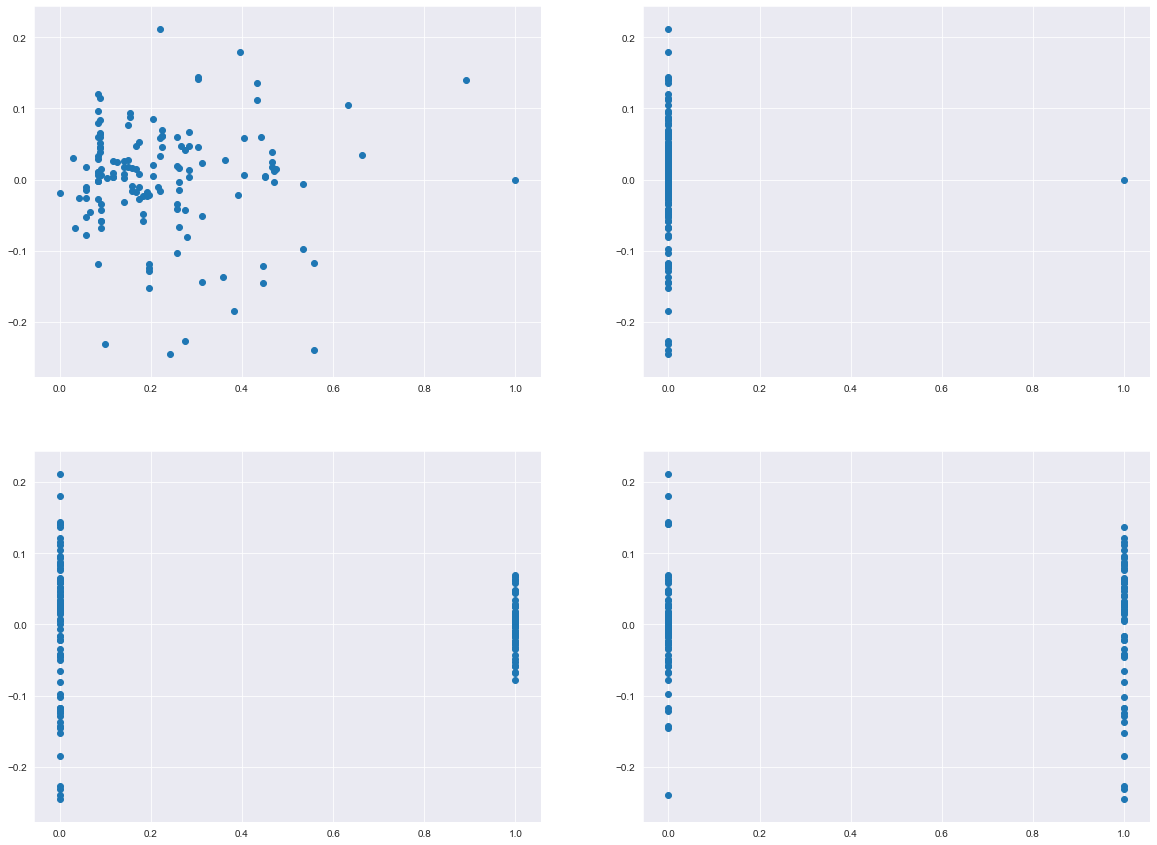

In [86]:
# Check for any patterns between residuals and the predictors
plt.figure(figsize=(20,15))
def create_scatter(X_var,sub):
    plt.subplot(sub)
    plt.scatter(X_train_rfe[X_var],res)
    
for i in range(len(X_train_rfe.columns)):
    sub = int('22' + str(i + 1))
    create_scatter(X_train_rfe.columns[i],sub)

plt.show()    

### There are no visible patterns here. It's safe to say that the assumption, the residuals are normally distributed, is valid.

## Step 6: Prediction and Evaluation

### Apply scaling to the test set

In [87]:
# check head of test set
car_price_test.head()

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,LowRange,MidRange
160,0,0,95.7,166.3,64.4,2094,98,3.19,70,7738.0,42.05,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
186,0,0,97.3,171.7,65.5,2275,109,3.19,85,8495.0,30.15,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
59,0,0,98.8,177.8,66.5,2385,122,3.39,84,8845.0,28.70,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
165,0,0,94.5,168.7,64.0,2265,98,3.24,112,9298.0,27.35,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
140,0,0,93.3,157.3,63.8,2240,108,3.62,73,7603.0,28.25,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [88]:
# list of numerical variables to be scaled
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 
            'horsepower', 'price', 'mileage']

# scale the numerical variables
car_price_test[num_vars] = scaler_obj.transform(car_price_test[num_vars])

# check head again
car_price_test.head()

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,LowRange,MidRange
160,0,0,0.313793,0.409756,0.341667,0.235066,0.139623,0.404762,0.091667,0.072382,0.747599,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
186,0,0,0.368966,0.497561,0.433333,0.305275,0.181132,0.404762,0.154167,0.093295,0.421125,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
59,0,0,0.420690,0.596748,0.516667,0.347944,0.230189,0.563492,0.150000,0.102964,0.381344,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
165,0,0,0.272414,0.448780,0.308333,0.301396,0.139623,0.444444,0.266667,0.115479,0.344307,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
140,0,0,0.231034,0.263415,0.291667,0.291699,0.177358,0.746032,0.104167,0.068652,0.368999,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


### Divide into X_test and y_test

In [89]:
y_test = car_price_test.pop('price')
X_test = car_price_test

# check shapes of X_test and y_test
print(y_train.shape)
print(X_train.shape)

(143,)
(143, 30)


In [90]:
X_train_rfe.columns

Index(['horsepower', 'dohcv', 'LowRange', 'MidRange'], dtype='object')

In [91]:
# Use model to predict on test set

# create X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# add constant to X_test_new
X_test_sm = sm.add_constant(X_test_new)

In [92]:
# Make predictions
y_pred = lm.predict(X_test_sm)

### Evaluate the test set

In [93]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8654844544592402

### The r2 score for train and teest set are quite close. It's with  $\pm$ 5 range. The model is good, since it has generalized on the test set as well.

### Plot y_test and y_pred to check the distribution

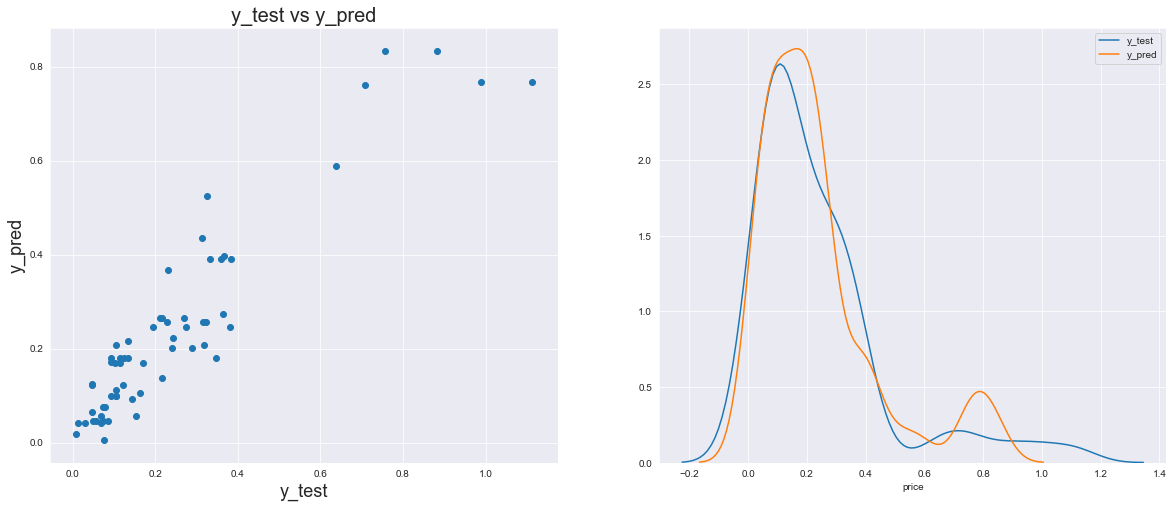

In [94]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.scatter(x=y_test,y=y_pred)
plt.title('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=18)

plt.subplot(122)
sns.distplot(y_test,hist=False, label='y_test')
sns.distplot(y_pred,hist=False,label='y_pred')
plt.show()

### Predicted values on the test data set have a linear relationship with the test data

## The equation of the best fitted line of the model:

$price = 0.3696 + 0.70 \times horsepower - 0.3436 \times dohcv - 0.3867 \times LowRange - 0.3049 \times MidRange$

### Inferences

1. For every 1 unit increase in **horsepower**, the **price** increases by 0.7 units, provided other predictors remain constant.


2. For every 1 unit increase in **dohcv (enginetype)**, the **price** decreases by 0.3436 units, provided other predictors remain constant.


3. For every 1 unit increase in **LowRange (CatCompany)**, the **price** decreases by 0.3867 units, provided other predictors remain constant.


4. For every 1 unit increase in **MidRange (CatCompany)**, the **price** decreases by 0.3049 units, provided other predictors remain constant.

### Check summary

In [95]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     231.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.47e-60
Time:                        13:20:15   Log-Likelihood:                 163.08
No. Observations:                 143   AIC:                            -316.2
Df Residuals:                     138   BIC:                            -301.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3696      0.030     12.184      0.000       0.310       0.430
horsepower     0.7001      0.052     13.452      0.000       0.597       0.803
dohcv         -0.3436      0.086     -3.987      0.000      -0.514      -0.173
LowRange      -0.3867      0.026    -14.730      0.000      -0.439      -0.335
MidRange      -0.3049      0.025    -12.236      0.000      -0.354      -0.256
==============================================================================
Omnibus:                       17.790   Durbin-Watson:                   2.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.620
Skew:                           0.693   Prob(JB):                     4.51e-06
Kurtosis:                       4.488   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Inferences:

1. **R-squared** and **Adjusted R-squared** are 0.87 and 0.867, which mean around 87% of the variance on the price is explained by the predictors.


2. **F-statistic** and **Prob (F-statistic)** are 231.8 and 3.47e-60, which is approx 0. It means that the overall model fit is significant.


3. **p-values** for all the coefficients are less than the significant value of 0.05, which means all the predictors are statistically significant.